# Movie Recommender System 
###### Sathwik Kesappragada

Does the recommended section provide satisfaction? Are the movie suggestions popping up elevate anyone’s mood? Do the advertisements appearing in between Instagram posts catch anybody’s attention? Is there a system that gives better movie suggestions? 

From the moment an individual unlocks his/her phone till the moment he/she puts it away, every action being committed is tracked and monitored, stored into data, that is confidential information sold to big corporations. Pew Research states that 81% of Americans own smartphones creating a push for relevant and accurate promotions that will influence a user’s decision-making process and attract customers. With complex supervision, people with smartphones are being schemed to stay on their cellular devices for longer periods of time to generate more revenue. Why? Companies with money can afford exceptional marketing. According to Business Wire, 60% of consumers click on cellphone ads every week suggesting how prevalent mobile advertising has become. Given these points, everyone is simply surrounded by recommender systems; people are constantly getting pitched ideas. From a simple Google search to a YouTube video to a Netflix original and to a song on Spotify, there exists a machine that advises its user based off of abundant data. 

## Part I.) Data Wrangling

#### Imports

In [1]:
#call all import statements and their necessary pacakges
import sys
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import datetime
import numpy as np
from ast import literal_eval
import seaborn as sns
import os
import missingno as msno 

In [2]:
#load data into variable
movies = pd.read_csv('C:/Users/sathw/OneDrive/Desktop/Springboard_work/IMDB-Movie-Ratings/rawdata/movies_metadata.csv', index_col = 'title', low_memory = False, nrows = 46000)
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
Toy Story,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",10/30/1995,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,7.7,5415.0
Jumanji,FALSE,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",12/15/1995,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,False,6.9,2413.0
Grumpier Old Men,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",12/22/1995,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,False,6.5,92.0
Waiting to Exhale,FALSE,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",12/22/1995,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,False,6.1,34.0
Father of the Bride Part II,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/10/1995,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,False,5.7,173.0


In [3]:
#45466 movies 
movies.shape

(45466, 23)

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45466 entries, Toy Story to Queerama
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 

In [5]:
movies.id.value_counts()

141971    3
15028     2
109962    2
23305     2
4912      2
         ..
16190     1
434234    1
146030    1
96147     1
323676    1
Name: id, Length: 45436, dtype: int64

In [6]:
type(movies['budget'].iloc[0])

str

In [7]:
type(movies['popularity'].iloc[0])

str

In [8]:
type(movies['genres'].iloc[0])

str

In [9]:
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')
movies['popularity'] = pd.to_numeric(movies['popularity'], errors = 'coerce')

In [10]:
#returns all movie titles
movies.index

Index([                  'Toy Story',                     'Jumanji',
                  'Grumpier Old Men',           'Waiting to Exhale',
       'Father of the Bride Part II',                        'Heat',
                           'Sabrina',                'Tom and Huck',
                      'Sudden Death',                   'GoldenEye',
       ...
                  'House of Horrors',   'Shadow of the Blair Witch',
               'The Burkittsville 7',             'Caged Heat 3000',
                        'Robin Hood',                      'Subdue',
               'Century of Birthing',                    'Betrayal',
                  'Satan Triumphant',                    'Queerama'],
      dtype='object', name='title', length=45466)

In [11]:
#looking at one record and all of its information
movies[movies.original_title == 'Toy Story'].transpose()

title,Toy Story
adult,FALSE
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ..."
budget,3e+07
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
homepage,http://toystory.disney.com/toy-story
id,862
imdb_id,tt0114709
original_language,en
original_title,Toy Story
overview,"Led by Woody, Andy's toys live happily in his ..."


In [12]:
#removes irrelevant information and returns just genres
movies['genres'] = movies['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [13]:
#similar to top, only displays country names
movies['production_countries'] = movies['production_countries'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [98]:
#cleanly organizes the column to simply display only companies 
movies['production_companies'] = movies['production_companies'].fillna('[]').apply(literal_eval)
movies['production_companies'] = movies['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x,list) else [])

In [14]:
#checking how many null values there are for each column/feature
missing = pd.concat([movies.isnull().sum(), 100 * movies.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='%', ascending = False)

,count,%
belongs_to_collection,40972,90.115691
homepage,37684,82.883913
tagline,25054,55.104914
overview,954,2.098271
poster_path,386,0.848986
runtime,263,0.578454
release_date,87,0.191352
status,87,0.191352
imdb_id,17,0.037391
original_language,11,0.024194


In [15]:
movies[movies.vote_count.isnull()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
NaN,FALSE,NaN,0.0,"[Action, Thriller, Drama]",NaN,82663,tt0113002,en,Midnight Man,British soldiers force a recently captured IRA...,...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,- Written by Ørnås,0.065736,NaN,"[Carousel Productions, Vision View Entertainme...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",8/20/1997,0,104,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,[],1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,FALSE,"{'id': 122661, 'name': 'Mardock Scramble Colle...",0.0,"[Animation, Science Fiction]",http://m-scramble.jp/exhaust/,122662,tt2423504,ja,マルドゥック・スクランブル 排気,Third film of the Mardock Scramble series.,...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Rune Balot goes to a casino connected to the ...,1.931659,NaN,"[Aniplex, GoHands, BROSTA TV, Mardock Scramble...","[{'iso_3166_1': 'US', 'name': 'United States o...",9/29/2012,0,68,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,[],12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,FALSE,NaN,0.0,"[TV Movie, Action, Horror, Science Fiction]",NaN,249260,tt2622826,en,Avalanche Sharks,A group of skiers are terrorized during spring...,...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Avalanche Sharks tells the story of a bikini ...,2.185485,NaN,"[Odyssey Media, Pulser Productions, Rogue Stat...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",1/1/2014,0,82,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,[],22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
movies = movies[~movies.vote_count.isnull()]

In [17]:
movies.shape

(45460, 23)

<function matplotlib.pyplot.show(*args, **kw)>

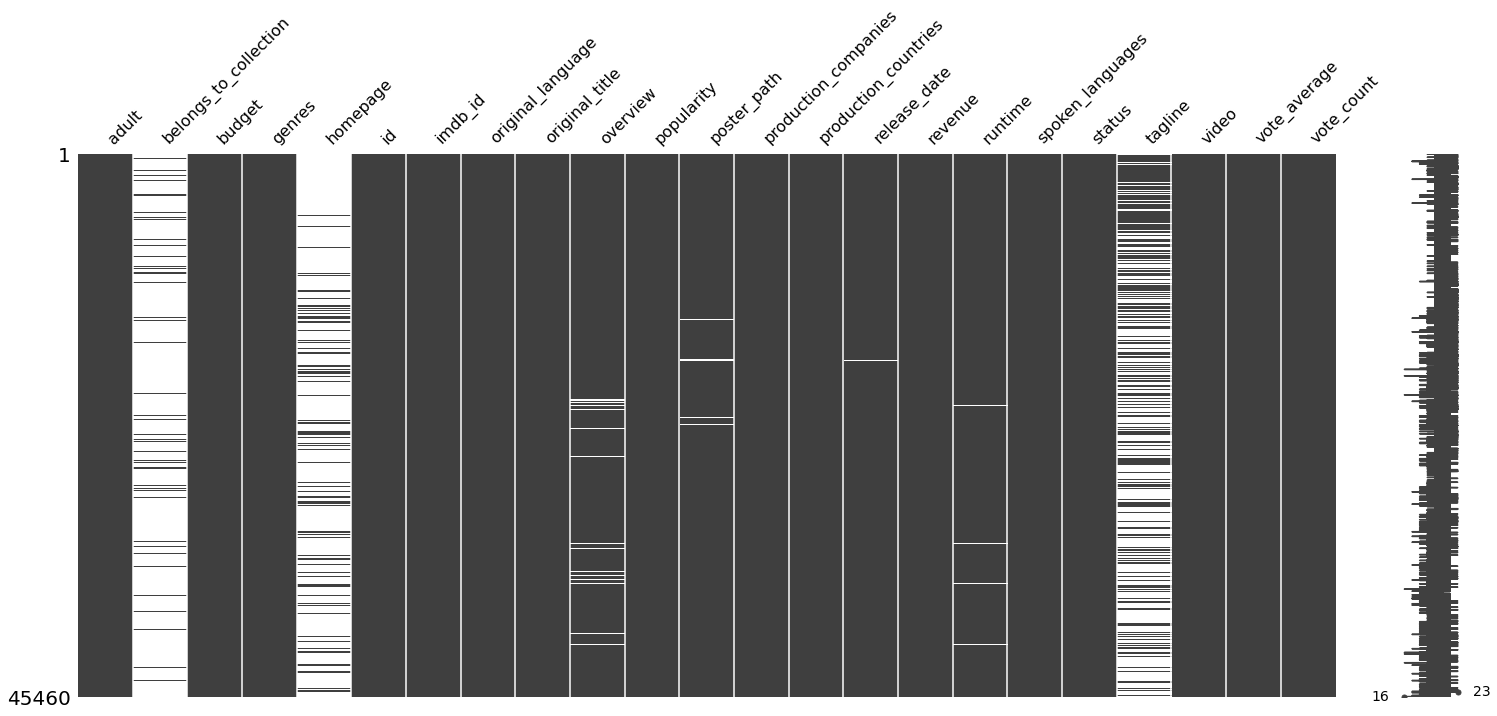

In [18]:
msno.matrix(movies)
plt.show

In [19]:
movies[movies['vote_average'].isna()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,


In [20]:
#looking for duplicates in movie title
movies['original_title'].value_counts().head(15)

Hamlet                           8
Alice in Wonderland              8
Macbeth                          7
Les Misérables                   7
A Christmas Carol                7
Cinderella                       7
The Three Musketeers             7
Wuthering Heights                6
King Lear                        6
The Hound of the Baskervilles    6
Blackout                         6
Treasure Island                  6
Frankenstein                     6
Heidi                            6
Jane Eyre                        6
Name: original_title, dtype: int64

In [21]:
#sometimes movies with the same title are released
#you can tell theyre different by looking at release dates
movies[movies['original_title'] == 'Macbeth'].transpose()

title,Macbeth,Macbeth,Macbeth,Macbeth,Macbeth,A Performance of Macbeth,Macbeth
adult,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
belongs_to_collection,NaN,NaN,NaN,NaN,NaN,NaN,NaN
budget,0,0,0,0,1.5e+07,0,0
genres,[Drama],[Drama],[Thriller],"[Thriller, Drama, Action]","[History, Drama, War]","[Drama, Foreign]",[Drama]
homepage,NaN,NaN,NaN,NaN,http://www.macbeth-movie.com/,NaN,NaN
id,27883,115427,119844,13775,225728,41149,133448
imdb_id,tt0040558,tt0292081,tt0084284,tt0434541,tt2884018,tt0079499,tt1570337
original_language,en,hu,en,en,en,en,en
original_title,Macbeth,Macbeth,Macbeth,Macbeth,Macbeth,Macbeth,Macbeth
overview,Orson Welles' unique take on Shakespeare's cla...,A Hungarian TV version of the play shot in jus...,Macbeth and his wife murder Duncan in order to...,"Macbeth, loyal to his crime boss, Duncan, is t...",Feature film adaptation of Shakespeare's Scott...,"Shakespeare's classic tragedy of ambition, wit...",Part of the PBS Great Performance Series. Reno...


In [22]:
#another method to identify duplicates 
(movies['original_title'] + ', ' + movies['release_date']).value_counts()

Blackout, 12/26/2008                                        3
The Congress, 5/16/2013                                     2
Days of Darkness, 1/1/2007                                  2
The Tempest, 2/27/1980                                      2
Deal, 1/29/2008                                             2
                                                           ..
Monster High: Escape from Skull Shores, 2/16/2012           1
Song of the Islands, 3/13/1942                              1
The Lord of the Rings: The Return of the King, 12/1/2003    1
Μαγική Πόλη, 7/18/1955                                      1
Mission: Impossible, 5/22/1996                              1
Length: 45346, dtype: int64

In [23]:
#literally everything is same
movies[movies['original_title'] == 'Blackout'].transpose()

title,Blackout,Blackout,Blackout,Blackout,Blackout,Blackout
adult,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
belongs_to_collection,NaN,NaN,NaN,NaN,NaN,NaN
budget,0,0,0,0,0,0
genres,"[Thriller, Mystery]","[Thriller, Mystery]","[Thriller, Mystery]","[Action, Thriller]","[Horror, Thriller]",[Documentary]
homepage,NaN,NaN,NaN,NaN,NaN,http://www.pbs.org/wgbh/americanexperience/fil...
id,141971,141971,141971,100063,226630,416951
imdb_id,tt1180333,tt1180333,tt1180333,tt0077241,tt0088816,tt4284046
original_language,fi,fi,fi,en,en,en
original_title,Blackout,Blackout,Blackout,Blackout,Blackout,Blackout
overview,Recovering from a nail gun shot to the head an...,Recovering from a nail gun shot to the head an...,Recovering from a nail gun shot to the head an...,A black comedy of violent criminals who terror...,A police officer suspects that a local husband...,"First responders, journalists, shop owners, th..."


In [24]:
movies[['original_title', 'release_date']].nunique()

original_title    43367
release_date      17333
dtype: int64

In [25]:
movies = movies.drop_duplicates(subset=['original_title', 'release_date'])

In [26]:
(movies['original_title'] + ', ' + movies['release_date']).value_counts()

Voyage to the Planet of Prehistoric Women, 1/1/1968    1
The Cheerleaders, 3/1/1973                             1
Il gatto a nove code, 2/11/1971                        1
着信アリ2, 2/5/2005                                        1
Kohta 18, 3/9/2012                                     1
                                                      ..
Risky Business, 8/5/1983                               1
Napoletani a Milano, 9/5/1953                          1
Nevalyashka, 4/26/2007                                 1
'Tis the Season for Love, 11/1/2015                    1
Mission: Impossible, 5/22/1996                         1
Length: 45346, dtype: int64

In [27]:
movies[movies['original_title']=='Blackout'].transpose()

title,Blackout,Blackout,Blackout,Blackout
adult,FALSE,FALSE,FALSE,FALSE
belongs_to_collection,NaN,NaN,NaN,NaN
budget,0,0,0,0
genres,"[Thriller, Mystery]","[Action, Thriller]","[Horror, Thriller]",[Documentary]
homepage,NaN,NaN,NaN,http://www.pbs.org/wgbh/americanexperience/fil...
id,141971,100063,226630,416951
imdb_id,tt1180333,tt0077241,tt0088816,tt4284046
original_language,fi,en,en,en
original_title,Blackout,Blackout,Blackout,Blackout
overview,Recovering from a nail gun shot to the head an...,A black comedy of violent criminals who terror...,A police officer suspects that a local husband...,"First responders, journalists, shop owners, th..."


In [28]:
movies['release_date'] = pd.to_datetime(movies['release_date'], errors = 'coerce')
oldest_movie_bydate = movies.release_date.min()
most_recent_bydate = movies.release_date.max()

In [29]:
print(oldest_movie_bydate)
print(most_recent_bydate)

1874-12-09 00:00:00
2020-12-16 00:00:00


In [30]:
movies[movies['release_date'] == oldest_movie_bydate]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
Passage of Venus,FALSE,NaN,0.0,[Documentary],NaN,315946,tt3155794,xx,Passage de Venus,Photo sequence of the rare transit of Venus ov...,...,[France],1874-12-09,0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,False,6.0,19.0


In [31]:
movies[movies['release_date'] == most_recent_bydate]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
Avatar 2,FALSE,"{'id': 87096, 'name': 'Avatar Collection', 'po...",0.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,76600,tt1630029,en,Avatar 2,A sequel to Avatar (2009).,...,[United States of America],2020-12-16,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",In Production,NaN,False,0.0,58.0


In [32]:
movies[movies['release_date'] > '2018-01-01 00:00:00']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
Avatar 2,FALSE,"{'id': 87096, 'name': 'Avatar Collection', 'po...",0.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,76600,tt1630029,en,Avatar 2,A sequel to Avatar (2009).,...,[United States of America],2020-12-16,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",In Production,NaN,False,0.0,58.0
Bad Boys for Life,FALSE,"{'id': 14890, 'name': 'Bad Boys Collection', '...",0.0,"[Thriller, Action, Crime]",NaN,38700,tt1502397,en,Bad Boys for Life,The continuing adventures of Miami detectives ...,...,[United States of America],2018-11-07,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Planned,NaN,False,0.0,12.0
Iron Sky: The Coming Race,FALSE,"{'id': 312977, 'name': 'Iron Sky Collection', ...",18000000.0,"[Action, Comedy, Fantasy, Science Fiction]",http://www.ironsky.net/,302349,tt3038708,en,Iron Sky: The Coming Race,"Twenty years after the events of Iron Sky, the...",...,"[Belgium, Finland, Germany]",2018-03-01,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Post Production,NaN,False,0.0,0.0
Mary Shelley,FALSE,NaN,0.0,"[Drama, Romance]",NaN,332283,tt3906082,en,Mary Shelley,The love affair between poet Percy Shelley and...,...,"[Ireland, Luxembourg, United Kingdom]",2018-04-25,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,False,0.0,1.0
The Other Side of the Wind,FALSE,NaN,12000000.0,"[Comedy, Drama]",NaN,299782,tt0069049,en,The Other Side of the Wind,"Orson Welles' unfinished masterpiece, restored...",...,"[Iran, United States of America]",2018-12-31,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,False,0.0,1.0
Mobile Homes,FALSE,NaN,0.0,[Drama],NaN,412059,tt5613402,en,Mobile Homes,"In forgotten towns along the American border, ...",...,"[France, Canada]",2018-04-04,0.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,False,0.0,1.0


In [33]:
# approximately 11% of movies in this dataset are drama
movies['genres'].value_counts().head(10)

[Drama]                     4996
[Comedy]                    3620
[Documentary]               2721
[]                          2442
[Drama, Romance]            1300
[Comedy, Drama]             1133
[Horror]                     974
[Comedy, Romance]            930
[Comedy, Drama, Romance]     593
[Drama, Comedy]              531
Name: genres, dtype: int64

In [34]:
movies['genres'].filter(regex= 'Drama|Comedy').count()

59

In [35]:
#print(movies.columns.isin(movies.genres).any())
# every movie record has a diff number of genres 
# returns number of how many genres are listed under each film
movies['num_genres'] = movies['genres'].str.len()
print(movies['num_genres'])   

title
Toy Story                      3
Jumanji                        3
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    1
                              ..
Subdue                         2
Century of Birthing            1
Betrayal                       3
Satan Triumphant               0
Queerama                       0
Name: num_genres, Length: 45430, dtype: int64


In [36]:
#checking to see how many 0s there are in each column
# 0s have a different meaning than null values 
zeros = pd.concat([(movies == 0).astype(int).sum(axis=0), 100 * (movies == 0).astype(int).mean(axis=0)], axis=1)
zeros.columns=['count', '%']
zeros.sort_values(by='%', ascending = False)

,count,%
video,45337,99.795289
revenue,38032,83.715606
budget,36550,80.453445
vote_average,2995,6.592560
vote_count,2896,6.374642
num_genres,2442,5.375303
runtime,1558,3.429452
popularity,66,0.145278
production_countries,0,0.000000
tagline,0,0.000000


In [37]:
# 32% of movies have only one genre
# 5% doesn't even have a genre listed
# 1.83% of movies have 5 genres 
movies['num_genres'].value_counts(normalize=True) #2442 movies don't have any genre 

1    0.320317
2    0.318512
3    0.210808
4    0.074312
0    0.053753
5    0.018248
6    0.003456
7    0.000528
8    0.000066
Name: num_genres, dtype: float64

In [38]:
movies['num_genres']

title
Toy Story                      3
Jumanji                        3
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    1
                              ..
Subdue                         2
Century of Birthing            1
Betrayal                       3
Satan Triumphant               0
Queerama                       0
Name: num_genres, Length: 45430, dtype: int64

In [127]:
movies_by_country = pd.DataFrame(movies['production_countries'].value_counts())
movies_by_country['country'] = movies_by_country.index
movies_by_country.columns = ['# of movies', 'country'] 
movies_by_country= movies_by_country.reset_index().drop('index', axis=1)

In [128]:
movies_by_country.head(10)

,# of movies,country
0,17841,[United States of America]
1,6279,[]
2,2238,[United Kingdom]
3,1653,[France]
4,1354,[Japan]
5,1030,[Italy]
6,840,[Canada]
7,748,[Germany]
8,735,[India]
9,735,[Russia]


In [134]:
num_lang = pd.DataFrame(movies['original_language'].value_counts())
num_lang['language'] = num_lang.index
num_lang.columns = ['# of movies', 'language']
num_lang.head(10)

,# of movies,language
en,32249,en
fr,2436,fr
it,1529,it
ja,1346,ja
de,1079,de
es,994,es
ru,826,ru
hi,508,hi
ko,444,ko
zh,409,zh


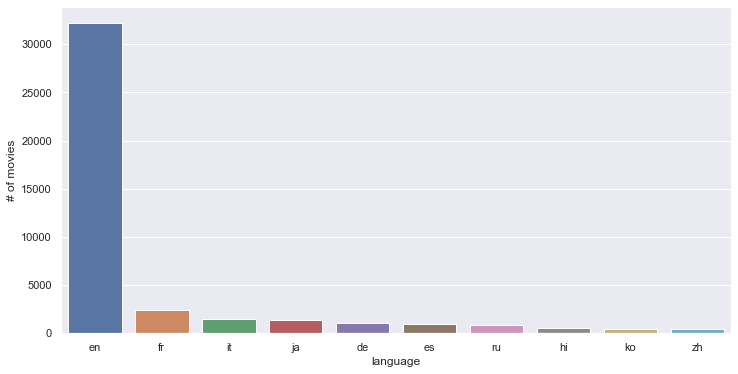

In [135]:
#top 10 by language
plt.figure(figsize=(12,6))
sns.barplot(x='language', y='# of movies', data=num_lang.iloc[0:10])
plt.show()

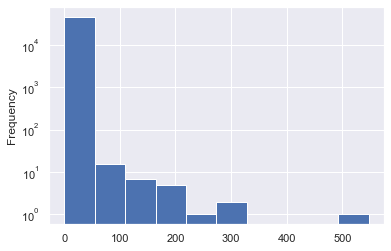

In [136]:
movies['popularity'].plot(logy=True,kind='hist')

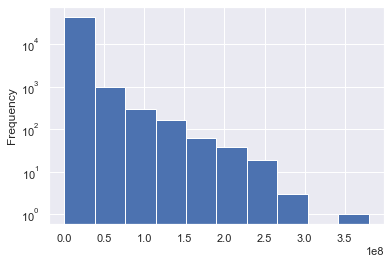

In [144]:
movies['budget'].plot(logy=True, kind='hist')

In [137]:
#top 10 movies by popularity
movies[['original_title', 'popularity', 'release_date']].sort_values('popularity', ascending=False).head(10)

,original_title,popularity,release_date
title,,,
Minions,Minions,547.488298,2015-06-17
Wonder Woman,Wonder Woman,294.337037,2017-05-30
Beauty and the Beast,Beauty and the Beast,287.253654,2017-03-16
Baby Driver,Baby Driver,228.032744,2017-06-28
Big Hero 6,Big Hero 6,213.849907,2014-10-24
Deadpool,Deadpool,187.860492,2016-02-09
Guardians of the Galaxy Vol. 2,Guardians of the Galaxy Vol. 2,185.330992,2017-04-19
Avatar,Avatar,185.070892,2009-12-10
John Wick,John Wick,183.870374,2014-10-22


In [143]:
#top 10 movies based on vote_count
movies[['vote_count', 'release_date']].sort_values('vote_count', ascending=False).head(10)

,vote_count,release_date
title,,
Inception,14075.0,2010-07-14
The Dark Knight,12269.0,2008-07-16
Avatar,12114.0,2009-12-10
The Avengers,12000.0,2012-04-25
Deadpool,11444.0,2016-02-09
Interstellar,11187.0,2014-11-05
Django Unchained,10297.0,2012-12-25
Guardians of the Galaxy,10014.0,2014-07-30
Fight Club,9678.0,1999-10-15


In [146]:
#top 10 most expensive movies
movies[movies['budget'] > 0][['budget','revenue', 'release_date']].sort_values('budget', ascending=False).head(10)

,budget,revenue,release_date
title,,,
Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09,2011-05-14
Pirates of the Caribbean: At World's End,300000000.0,9.610000e+08,2007-05-19
Avengers: Age of Ultron,280000000.0,1.405404e+09,2015-04-22
Superman Returns,270000000.0,3.910812e+08,2006-06-28
Transformers: The Last Knight,260000000.0,6.049421e+08,2017-06-21
Tangled,260000000.0,5.917949e+08,2010-11-24
John Carter,260000000.0,2.841391e+08,2012-03-07
Spider-Man 3,258000000.0,8.908716e+08,2007-05-01
The Lone Ranger,255000000.0,8.928991e+07,2013-07-03


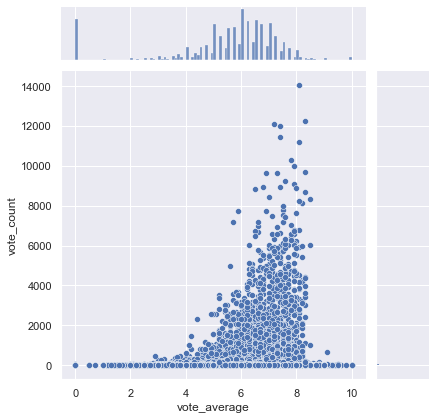

In [140]:
_ = sns.jointplot(x='vote_average', y='vote_count', data=movies)
plt.show()

In [142]:
# you can notice that all of these listed have very long runtimes and that these are actually mini-series
movies[movies['runtime'] >0][['runtime','release_date']].sort_values('runtime', ascending=False).head(10)

,runtime,release_date
title,,
Centennial,1256.0,1978-10-01
Jazz,1140.0,2001-01-09
Baseball,1140.0,1994-09-18
Berlin Alexanderplatz,931.0,1980-08-28
Heimat: A Chronicle of Germany,925.0,1984-09-16
The Story of Film: An Odyssey,900.0,2011-09-03
Taken,877.0,2002-12-02
The War,874.0,2007-09-23
The Roosevelts: An Intimate History,840.0,2014-09-15


In [39]:
movies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
budget,45430.0,4.224828e+06,1.742853e+07,0.0,0.000000,0.000000,0.000000,3.800000e+08
popularity,45430.0,2.921206e+00,6.006708e+00,0.0,0.385872,1.127238,3.678128,5.474883e+02
revenue,45430.0,1.121288e+07,6.435213e+07,0.0,0.000000,0.000000,0.000000,2.787965e+09
runtime,45173.0,9.412430e+01,3.841554e+01,0.0,85.000000,95.000000,107.000000,1.256000e+03
vote_average,45430.0,5.618329e+00,1.924139e+00,0.0,5.000000,6.000000,6.800000,1.000000e+01
vote_count,45430.0,1.099360e+02,4.914663e+02,0.0,3.000000,10.000000,34.000000,1.407500e+04
num_genres,45430.0,2.003214e+00,1.130713e+00,0.0,1.000000,2.000000,3.000000,8.000000e+00


In [40]:
movie_with_one = movies[movies['num_genres'] == 1]

In [41]:
movie_with_one.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
budget,14552.0,1.476017e+06,7.644903e+06,0.0,0.000000,0.000000,0.000000,1.900000e+08
popularity,14552.0,1.929592e+00,3.115950e+00,0.0,0.247577,0.766259,2.017234,6.429999e+01
revenue,14552.0,3.710493e+06,2.600311e+07,0.0,0.000000,0.000000,0.000000,1.506249e+09
runtime,14430.0,9.020312e+01,4.027209e+01,0.0,82.000000,92.000000,104.000000,1.140000e+03
vote_average,14552.0,5.582992e+00,2.117373e+00,0.0,5.000000,6.000000,6.900000,1.000000e+01
vote_count,14552.0,4.617159e+01,2.135003e+02,0.0,2.000000,7.000000,20.000000,9.678000e+03
num_genres,14552.0,1.000000e+00,0.000000e+00,1.0,1.000000,1.000000,1.000000,1.000000e+00


In [42]:
movie_with_two = movies[movies['num_genres'] == 2]

Text(0, 0.5, 'Genres')

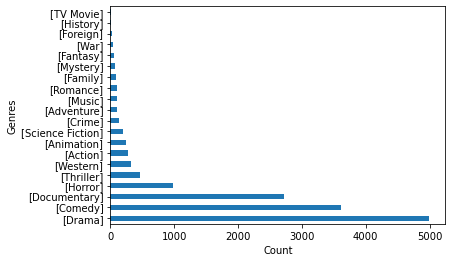

In [43]:
movie_with_one['genres'].value_counts().plot(kind='barh') # 20 unique single genres
plt.xlabel('Count')
plt.ylabel('Genres')   

Text(0, 0.5, 'Genres')

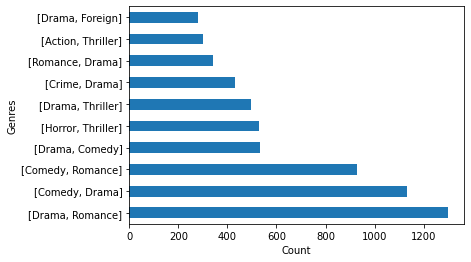

In [44]:
movie_with_two['genres'].value_counts().head(10).plot(kind ='barh') #303 unique pairs
plt.xlabel('Count')
plt.ylabel('Genres')

In [45]:
movie_genres_key=movie_with_one['genres'].apply(lambda x: '_'.join((map(str,x))))

In [46]:
print(type(movie_genres_key))

<class 'pandas.core.series.Series'>


In [47]:
sns.set()

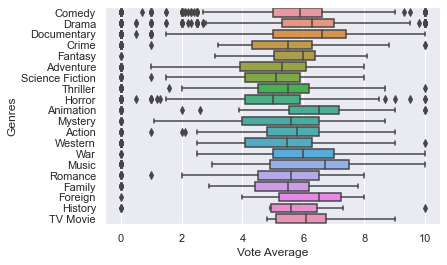

In [48]:
_ = sns.boxplot(data = movie_with_one, y=movie_genres_key, x='vote_average', orient = "h")
_ = plt.xlabel('Vote Average')
_ = plt.ylabel('Genres')
plt.show()

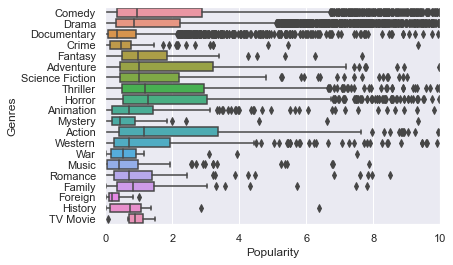

In [49]:
#zoomed into the plot for a better view
_ = sns.boxplot(data = movie_with_one, y=movie_genres_key, x='popularity', orient = "h")
_ = plt.xlabel('Popularity')
_ = plt.ylabel('Genres')
_ = plt.xlim(0,10)
plt.show()

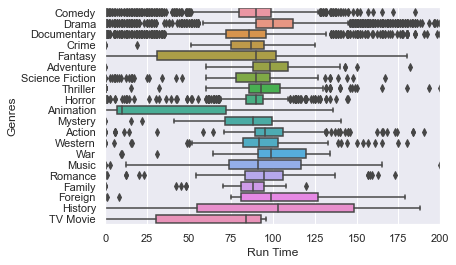

In [50]:
#zoomed into the plot for a better view
_ = sns.boxplot(data = movie_with_one, y=movie_genres_key, x='runtime', orient = "h")
_ = plt.xlabel('Run Time')
_ = plt.ylabel('Genres')
_ = plt.xlim(0,200)
plt.show()

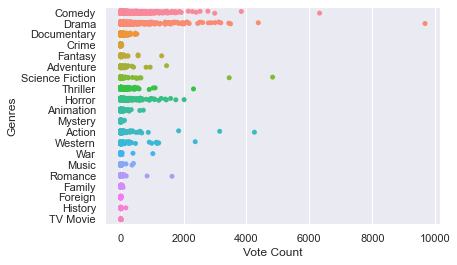

In [51]:
_ = sns.stripplot(data = movie_with_one, y=movie_genres_key, x = 'vote_count', jitter=True)
_ = plt.xlabel('Vote Count')
_ = plt.ylabel('Genres')

In [52]:
#_ = plt.hist('vote_count','vote_average', bins=(10,10))
#plt.show()

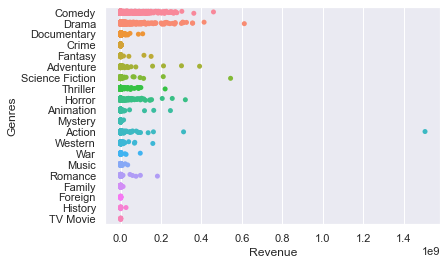

In [53]:
_ = sns.stripplot(data = movie_with_one, y=movie_genres_key, x='revenue')
_ = plt.xlabel('Revenue')
_ = plt.ylabel('Genres')
plt.show()

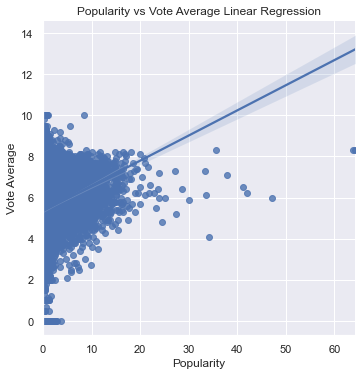

In [54]:
_ = sns.lmplot(x='popularity', y='vote_average', data=movie_with_one)
_ = plt.xlabel('Popularity')
_ = plt.ylabel('Vote Average')
_ = plt.title('Popularity vs Vote Average Linear Regression')
plt.show()

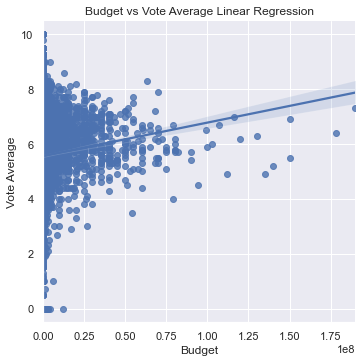

In [55]:
_ = sns.lmplot(x='budget', y='vote_average', data=movie_with_one,palette='Set1')
_ = plt.xlabel('Budget')
_ = plt.ylabel('Vote Average')
_ = plt.title('Budget vs Vote Average Linear Regression')
plt.show()

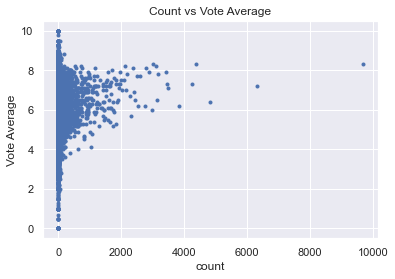

In [56]:
_ = plt.plot(movie_with_one['vote_count'], movie_with_one['vote_average'], marker='.', linestyle='none')
_ = plt.xlabel('count')
_ = plt.ylabel('Vote Average')
_ = plt.title('Count vs Vote Average')
plt.show()

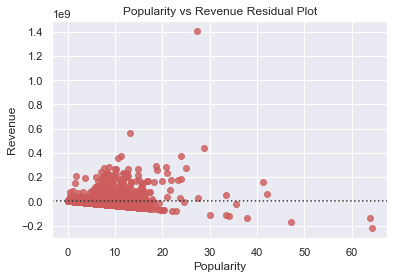

In [57]:
_ = sns.residplot(x= 'popularity', y= 'revenue', data=movie_with_one, color = 'indianred')
_ = plt.xlabel('Popularity')
_ = plt.ylabel('Revenue')
_ = plt.title('Popularity vs Revenue Residual Plot')

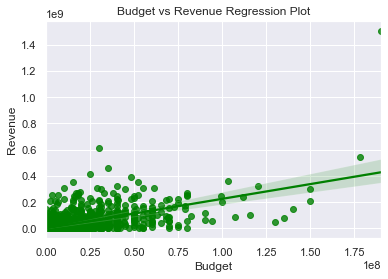

In [58]:
_ = sns.regplot(x= 'budget', y= 'revenue', data=movie_with_one, color = 'green')
_ = plt.xlabel('Budget')
_ = plt.ylabel('Revenue')
_ = plt.title('Budget vs Revenue Regression Plot')

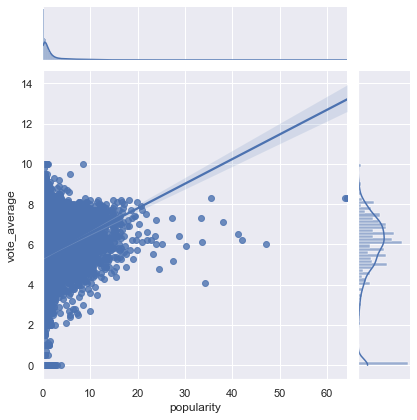

In [59]:
sns.jointplot(x="popularity", y="vote_average", data=movie_with_one, kind="reg");

In [60]:
stats = pd.DataFrame(movie_with_one.groupby(movie_genres_key).describe())

In [62]:
stats.columns

MultiIndex([(      'budget', 'count'),
            (      'budget',  'mean'),
            (      'budget',   'std'),
            (      'budget',   'min'),
            (      'budget',   '25%'),
            (      'budget',   '50%'),
            (      'budget',   '75%'),
            (      'budget',   'max'),
            (  'popularity', 'count'),
            (  'popularity',  'mean'),
            (  'popularity',   'std'),
            (  'popularity',   'min'),
            (  'popularity',   '25%'),
            (  'popularity',   '50%'),
            (  'popularity',   '75%'),
            (  'popularity',   'max'),
            (     'revenue', 'count'),
            (     'revenue',  'mean'),
            (     'revenue',   'std'),
            (     'revenue',   'min'),
            (     'revenue',   '25%'),
            (     'revenue',   '50%'),
            (     'revenue',   '75%'),
            (     'revenue',   'max'),
            (     'runtime', 'count'),
            (     'runtim

In [63]:
stats.columns = ['budget_count','budget_mean','budget_std','budget_min', 'budget_25p', 'budget_50p', 'budget_75p', 'budget_max',
'popularity_count','popularity_mean','popularity_std','popularity_min', 'popularity_25p', 'popularity_50p', 'popularity_75p', 'popularity_max',
'revenue_count','revenue_mean','revenue_std','revenue_min', 'revenue_25p', 'revenue_50p', 'revenue_75p', 'revenue_max',                 
'runtime_count','runtime_mean','runtime_std','runtime_min', 'runtime_25p', 'runtime_50p', 'runtime_75p', 'runtime_max',
'vote_average_count','vote_average_mean','vote_average_std','vote_average_min', 'vote_average_25p', 'vote_average_50p', 'vote_average_75p', 'vote_average_max',
'vote_count_count', 'vote_count_mean', 'vote_count_std','vote_count_min', 'vote_count_25p', 'vote_count_50p', 'vote_count_75p', 'vote_count_max',
'num_genres_count','num_genres_mean','num_genres_std','num_genres_min', 'num_genres_25p', 'num_genres_50p', 'num_genres_75p', 'num_genres_max']

In [64]:
stats

,budget_count,budget_mean,budget_std,budget_min,budget_25p,budget_50p,budget_75p,budget_max,popularity_count,popularity_mean,...,vote_count_75p,vote_count_max,num_genres_count,num_genres_mean,num_genres_std,num_genres_min,num_genres_25p,num_genres_50p,num_genres_75p,num_genres_max
genres,,,,,,,,,,,,,,,,,,,,,
Action,278.0,4.572418e+06,1.744645e+07,0.0,0.0,0.0,0.0,190000000.0,278.0,2.781620,...,26.00,4253.0,278.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Adventure,110.0,7.870664e+06,2.310080e+07,0.0,0.0,0.0,0.0,150000000.0,110.0,2.672130,...,36.75,1459.0,110.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Animation,242.0,1.273816e+06,8.001286e+06,0.0,0.0,0.0,0.0,99000000.0,242.0,1.470265,...,16.75,720.0,242.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Comedy,3620.0,2.308151e+06,9.138128e+06,0.0,0.0,0.0,0.0,112000000.0,3620.0,2.319682,...,29.00,6324.0,3620.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Crime,134.0,1.676642e+05,1.570883e+06,0.0,0.0,0.0,0.0,18000000.0,134.0,0.795429,...,5.00,38.0,134.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Documentary,2721.0,7.654178e+04,9.729245e+05,0.0,0.0,0.0,0.0,35866397.0,2721.0,0.839767,...,9.00,516.0,2721.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Drama,4996.0,1.444392e+06,6.795743e+06,0.0,0.0,0.0,0.0,130000000.0,4996.0,2.076730,...,20.00,9678.0,4996.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Family,91.0,5.397802e+04,3.222319e+05,0.0,0.0,0.0,0.0,2200000.0,91.0,1.196871,...,10.50,78.0,91.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Fantasy,51.0,5.214668e+06,2.117119e+07,0.0,0.0,0.0,0.0,140000000.0,51.0,2.564205,...,21.00,1303.0,51.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [65]:
movie_with_one[movie_genres_key == 'TV Movie']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count,num_genres
title,,,,,,,,,,,,,,,,,,,,,
David Copperfield,FALSE,NaN,0.0,[TV Movie],NaN,141640,tt0238768,it,David Copperfield,An orphan with a rough childhood becomes a bar...,...,2001-12-25,0.0,0.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,False,4.8,5.0,1
The Pretender 2001,FALSE,NaN,0.0,[TV Movie],NaN,27338,tt0271732,en,The Pretender 2001,Jarod reunites with two old friends and unleas...,...,2001-01-22,0.0,96.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,He is a master of disguise. She is a master of...,False,5.4,5.0,1
Gangsta Granny,FALSE,NaN,0.0,[TV Movie],NaN,245739,tt3286484,en,Gangsta Granny,A young boy is bored spending time with his du...,...,2013-12-26,0.0,60.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,4.8,8.0,1
Naughty or Nice,FALSE,NaN,0.0,[TV Movie],NaN,145711,tt2417134,en,Naughty or Nice,Krissy Kringle receives a delivery intended fo...,...,2012-12-24,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,6.1,19.0,1
October Kiss,FALSE,NaN,0.0,[TV Movie],NaN,362884,tt5076032,en,October Kiss,Poppy Summerall is hired near Halloween as a t...,...,2015-10-17,0.0,84.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,6.5,6.0,1
Den radio,FALSE,NaN,0.0,[TV Movie],NaN,143883,tt5952180,ru,День Радио (Спектакль),NaN,...,2001-03-24,0.0,0.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,False,9.0,5.0,1
The Idiot,FALSE,NaN,0.0,[TV Movie],NaN,444623,tt0366028,ru,Idiot,TV miniseries of the Dostoevsky novel.,...,2003-04-01,0.0,550.0,[],Released,NaN,False,7.0,1.0,1


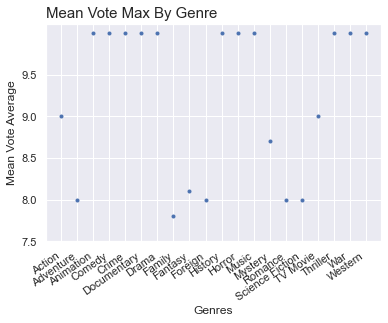

In [66]:
_ =plt.errorbar(x = stats.index, y='vote_average_max',data =stats, marker = '.', linestyle='none')
_ = plt.xticks(rotation=35, ha='right')
_ = plt.yticks(np.arange(7.5,10,0.5)) 
_ = plt.xlabel('Genres')
_ = plt.ylabel('Mean Vote Average')
_ = plt.title("Mean Vote Max By Genre", loc="left", fontsize=15)
plt.show()

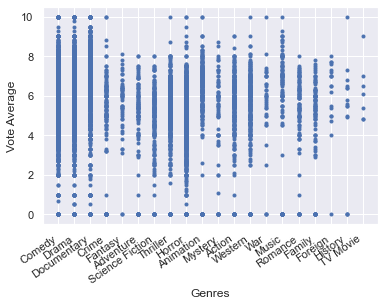

In [67]:
_ = plt.errorbar(y = "vote_average", x= movie_genres_key, linestyle='None', marker='.', data = movie_with_one)
_ = plt.xticks(rotation=35, ha='right')
_ = plt.xlabel('Genres')
_ = plt.ylabel('Vote Average')
plt.show()

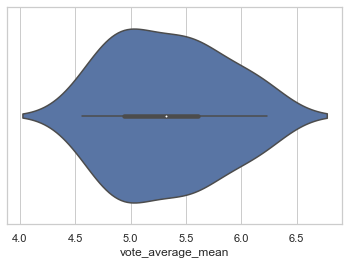

In [68]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x='vote_average_mean', data = stats)

In [69]:
mgk=movies['genres'].apply(lambda x: '_'.join((map(str,x))))

In [70]:
all_movies = movies.groupby(mgk).agg([np.mean, np.std]) 
all_movies

budget               popularity  \
                                           mean           std       mean   
genres                                                                     
                                   4.719209e+04  5.923161e+05   0.304807   
Action                             4.572418e+06  1.744645e+07   2.781620   
Action_Adventure                   1.074973e+07  3.400718e+07   3.673668   
Action_Adventure_Animation         3.500000e+05  1.106797e+06   3.758203   
Action_Adventure_Animation_Comedy  0.000000e+00  0.000000e+00   2.920726   
...                                         ...           ...        ...   
Western_Science Fiction            2.000000e+06           NaN   1.225217   
Western_TV Movie                   2.500000e+06  3.535534e+06   0.726138   
Western_Thriller                   2.333333e+06  4.041452e+06   2.560855   
Western_War                        0.000000e+00           NaN   0.515080   
Western_War_History_Romance        0.000000e+00           NaN   1.159273   

                                                  revenue                \
                                        std          mean           std   
genres                                                                    
                                   0.490416  7.639705e+04  2.505130e+06   
Action                             4.904922  1.080632e+07  9.359374e+07   
Action_Adventure                   6.680113  1.844821e+07  6.415925e+07   
Action_Adventure_Animation         2.459331  0.000000e+00  0.000000e+00   
Action_Adventure_Animation_Comedy  0.836934  0.000000e+00  0.000000e+00   
...                                     ...           ...           ...   
Western_Science Fiction                 NaN  0.000000e+00           NaN   
Western_TV Movie                   0.769727  0.000000e+00  0.000000e+00   
Western_Thriller                   2.842772  2.049000e+03  3.548972e+03   
Western_War                             NaN  0.000000e+00           NaN   
Western_War_History_Romance             NaN  0.000000e+00           NaN   

                                      runtime            vote_average  \
                                         mean        std         mean   
genres                                                                  
                                    69.984349  57.955564     4.239435   
Action                              98.446043  34.475476     5.444964   
Action_Adventure                   101.419355  41.122384     5.164516   
Action_Adventure_Animation          79.100000  26.134056     6.120000   
Action_Adventure_Animation_Comedy  115.000000   7.071068     6.900000   
...                                       ...        ...          ...   
Western_Science Fiction             87.000000        NaN     5.300000   
Western_TV Movie                   104.000000  22.627417     1.400000   
Western_Thriller                    96.000000   8.544004     4.866667   
Western_War                        105.000000        NaN     6.400000   
Western_War_History_Romance        113.000000        NaN     7.000000   

                                             vote_count              \
                                        std        mean         std   
genres                                                                
                                   3.069244    2.944308    9.940223   
Action                             1.700656   72.863309  348.051030   
Action_Adventure                   1.625052  114.881720  373.998019   
Action_Adventure_Animation         2.241428   73.000000   79.664575   
Action_Adventure_Animation_Comedy  0.000000   17.500000    3.535534   
...                                     ...         ...         ...   
Western_Science Fiction                 NaN    9.000000         NaN   
Western_TV Movie                   1.979899    2.000000    1.414214   
Western_Thriller                   1.628906   29.000000   36.592349   
Western_War                             NaN    5.0

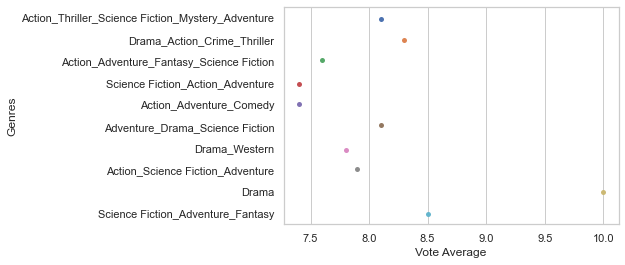

In [71]:
topmovies = movies.groupby(by=mgk)[['vote_average', 'vote_count']].max().sort_values(by='vote_count', ascending=False).head(10)
_ = sns.stripplot(data = topmovies, y=topmovies.index, x='vote_average', orient="h")
_ = plt.xlabel('Vote Average')
_ = plt.ylabel('Genres')
plt.show()

In [72]:
#fivemovies = movies.groupby(mgk)['vote_average'].max().sort_values(ascending = False).head(10)
#_ = sns.boxplot(data = fivemovies, y=fivemovies.index, x= fivemovies['vote_average'], orient = 'h')
#plt.show()

In [73]:
movies[mgk.str.contains('Drama')].describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,num_genres
count,2.024300e+04,20243.000000,2.024300e+04,20189.000000,20243.000000,20243.000000,20243.000000
mean,3.460486e+06,3.010777,7.943673e+06,103.050374,5.905888,96.570074,2.325890
std,1.297377e+07,4.422499,4.322779e+07,35.008632,1.696579,417.306082,1.074516
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000
25%,0.000000e+00,0.503283,0.000000e+00,90.000000,5.400000,4.000000,2.000000
50%,0.000000e+00,1.322188,0.000000e+00,100.000000,6.200000,11.000000,2.000000
75%,0.000000e+00,4.131608,0.000000e+00,114.000000,6.900000,37.000000,3.000000
max,2.500000e+08,154.801009,1.845034e+09,1256.000000,10.000000,12269.000000,8.000000


In [74]:
all_movies.columns

MultiIndex([(      'budget', 'mean'),
            (      'budget',  'std'),
            (  'popularity', 'mean'),
            (  'popularity',  'std'),
            (     'revenue', 'mean'),
            (     'revenue',  'std'),
            (     'runtime', 'mean'),
            (     'runtime',  'std'),
            ('vote_average', 'mean'),
            ('vote_average',  'std'),
            (  'vote_count', 'mean'),
            (  'vote_count',  'std'),
            (  'num_genres', 'mean'),
            (  'num_genres',  'std')],
           )

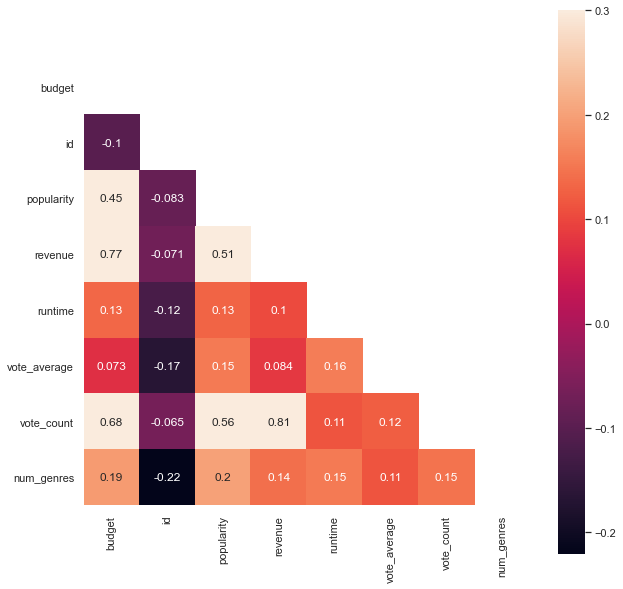

In [96]:
sns.set(font_scale = 1)
corr = movies.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True
with sns.axes_style('white'):
    plt.figure(figsize = (10,10))
    _ = sns.heatmap(corr, mask= mask, vmax=.3, square=True, annot=True);

In [76]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x=col,  y= 'vote_average', data=movies, alpha=0.5)
        ax.set(xlabel=col, ylabel='Vote Average')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [77]:
features = [col for col in movies.columns if col in ['revenue', 'popularity', 'vote_count', 'runtime', 'budget', 'num_genres']]

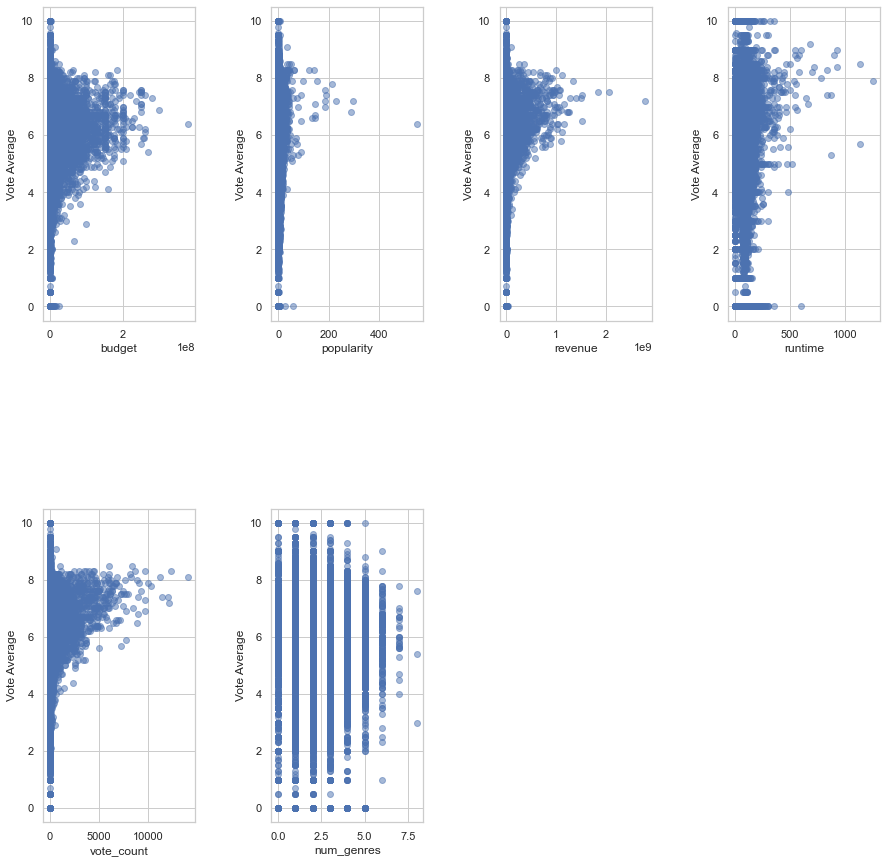

In [78]:
scatterplots(features, ncol=4, figsize=(15, 15))

In [79]:
ratings = pd.read_csv('C:/Users/sathw/OneDrive/Desktop/Springboard_work/IMDB-Movie-Ratings/rawdata/ratings.csv', nrows = 2600000)
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [80]:
ratings = ratings.rename(columns = {'movieId': 'id'})

In [81]:
ratings.id = ratings.id.astype(int)

In [82]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit= 's')

In [83]:
ratings['timestamp']

0         2015-03-09 22:52:09
1         2015-03-09 23:07:15
2         2015-03-09 22:52:03
3         2015-03-09 22:52:26
4         2015-03-09 22:52:36
                  ...        
2599995   2003-08-09 11:36:35
2599996   2002-12-25 23:21:00
2599997   2006-03-20 15:27:47
2599998   2003-08-18 15:54:40
2599999   2003-08-18 16:00:20
Name: timestamp, Length: 2600000, dtype: datetime64[ns]

In [84]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600000 entries, 0 to 2599999
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   userId     int64         
 1   id         int32         
 2   rating     float64       
 3   timestamp  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1)
memory usage: 69.4 MB


In [85]:
ratings.shape

(2600000, 4)

In [86]:
ratings.head(10)

,userId,id,rating,timestamp
0,1,110,1.0,2015-03-09 22:52:09
1,1,147,4.5,2015-03-09 23:07:15
2,1,858,5.0,2015-03-09 22:52:03
3,1,1221,5.0,2015-03-09 22:52:26
4,1,1246,5.0,2015-03-09 22:52:36
5,1,1968,4.0,2015-03-09 23:02:28
6,1,2762,4.5,2015-03-09 22:48:20
7,1,2918,5.0,2015-03-09 22:53:13
8,1,2959,4.0,2015-03-09 22:53:21
9,1,4226,4.0,2015-03-09 23:03:48


In [87]:
#checking how many null values there are for each column/feature
missing = pd.concat([ratings.isnull().sum(), 100 * ratings.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='%', ascending = False)

,count,%
userId,0,0.0
id,0,0.0
rating,0,0.0
timestamp,0,0.0


In [88]:
ratings.rating = 2*ratings.rating

In [89]:
ratings.rating.value_counts().sort_values(ascending=False)

8.0     703710
6.0     535968
10.0    376351
7.0     310489
9.0     214188
4.0     176983
5.0     123399
2.0      83613
3.0      38177
1.0      37122
Name: rating, dtype: int64

Text(0, 0.5, 'count')

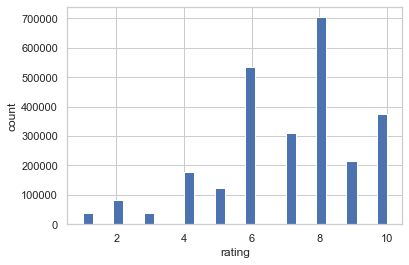

In [90]:
ratings.rating.hist(bins=30)
plt.xlabel('rating')
plt.ylabel('count')

In [91]:
ratings.rating.mean()

7.059199615384616

In [92]:
ratings.rating.std(ddof=0)

2.112096029184034

In [93]:
movies['id'] = movies['id'].astype(int)
#pd.to_numeric(movies['id'], errors = 'coerce')
#movies[movies['id']== '8/20/1997']

In [94]:
movies.shape

(45430, 24)

In [95]:
movies.id

title
Toy Story                         862
Jumanji                          8844
Grumpier Old Men                15602
Waiting to Exhale               31357
Father of the Bride Part II     11862
                                ...  
Subdue                         439050
Century of Birthing            111109
Betrayal                        67758
Satan Triumphant               227506
Queerama                       461257
Name: id, Length: 45430, dtype: int32

In [99]:
combined_df = pd.merge(ratings,movies, on ='id', how='inner')

In [100]:
combined_df.info()           

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2639635 entries, 0 to 2639634
Data columns (total 27 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   userId                 float64       
 1   id                     int64         
 2   rating                 float64       
 3   timestamp              datetime64[ns]
 4   adult                  object        
 5   belongs_to_collection  object        
 6   budget                 float64       
 7   genres                 object        
 8   homepage               object        
 9   imdb_id                object        
 10  original_language      object        
 11  original_title         object        
 12  overview               object        
 13  popularity             float64       
 14  poster_path            object        
 15  production_companies   object        
 16  production_countries   object        
 17  release_date           datetime64[ns]
 18  revenue               

In [101]:
combined_df.shape

(2639635, 27)

In [ ]:
combined_df.

In [102]:
combined_df['id'].value_counts()

356       9293
318       9231
296       8764
593       8451
2571      7805
          ... 
187447       1
136238       1
154663       1
230428       1
197528       1
Name: id, Length: 65195, dtype: int64

In [103]:
combined_df.groupby(by='original_title')['rating'].count().sort_values(ascending=False).head(10)

original_title
The Million Dollar Hotel              9231
Terminator 3: Rise of the Machines    8764
Солярис                               8451
The 39 Steps                          7747
Monsoon Wedding                       7521
Once Were Warriors                    6853
Trois couleurs : Rouge                6639
License to Wed                        6056
La passion de Jeanne d'Arc            5783
48 Hrs.                               5774
Name: rating, dtype: int64

In [104]:
combined_df.isnull().sum()

userId                     39635
id                             0
rating                     39635
timestamp                  39635
adult                    1456429
belongs_to_collection    2363683
budget                   1456429
genres                   1456429
homepage                 2358275
imdb_id                  1456455
original_language        1456442
original_title           1456429
overview                 1461369
popularity               1456429
poster_path              1457793
production_companies     1456429
production_countries     1456429
release_date             1457231
revenue                  1456429
runtime                  1456768
spoken_languages         1456429
status                   1456579
tagline                  1827887
video                    1456429
vote_average             1456429
vote_count               1456429
num_genres               1456429
dtype: int64

In [105]:
ratings_df = pd.DataFrame(combined_df.groupby('original_title')['rating'].mean())  
  
ratings_df['num_ratings'] = pd.DataFrame(combined_df.groupby('original_title')['rating'].count()) 
  
ratings_df.sort_values(by='num_ratings', ascending=False).head(10) 

,rating,num_ratings
original_title,,
The Million Dollar Hotel,8.833604,9231
Terminator 3: Rise of the Machines,8.370379,8764
Солярис,8.298545,8451
The 39 Steps,8.243449,7747
Monsoon Wedding,7.305544,7521
Once Were Warriors,8.508099,6853
Trois couleurs : Rouge,8.023949,6639
License to Wed,8.448151,6056
La passion de Jeanne d'Arc,6.774511,5783


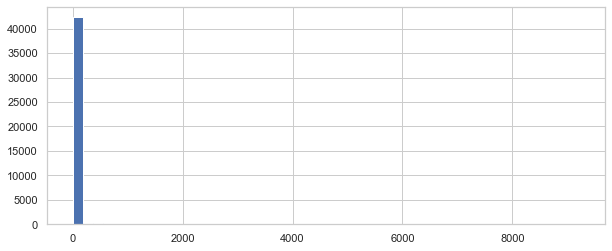

In [106]:
plt.figure(figsize=(10,4))
ratings_df['num_ratings'].hist(bins = 50)

In [107]:
movie_mat = combined_df.pivot_table(index ='id', columns ='original_title', values ='rating') 

In [108]:
movie_mat.shape

(5795, 5717)

In [109]:
movie

NameError: name 'movie' is not defined

In [ ]:
#movie_small = movie_small.rename(columns = {'original_title': 'title'})

In [ ]:
#movie_small.head()

In [ ]:
#movie_small.dtypes

In [ ]:
#movie_small.dtypes

In [ ]:
#movie_small.isnull().sum()

In [ ]:
#movie_small[movie_small['id'].isna()]

In [ ]:
#combined_df = pd.merge(diff_look_clean,ratings, on = 'id')

In [ ]:
#combined_df.groupby(by ='title')[['vote_average', 'vote_count']].max().sort_values(by = 'vote_count', ascending = False)